In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project'
!ls

/content/drive/MyDrive/Colab Notebooks/Senior Project
 best_model3cls.h5   data				        GUI_Demo_VS	 Train
 checkclass.py	     data.rar				       'Lastest Model'
 Combination.py      gerald-berliner-pnPIwLU8goU-unsplash.png   Test


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project'
!rm -rf data
print("Delete data folder and extract agian")
!unrar x data.rar

Streaming output truncated to the last 5000 lines.
Extracting  data/train/ร/ร_79.png                                         62%  OK 
Extracting  data/train/ร/ร_8.png                                          62%  OK 
Extracting  data/train/ร/ร_80.png                                         62%  OK 
Extracting  data/train/ร/ร_81.png                                         62%  OK 
Extracting  data/train/ร/ร_82.png                                         62%  OK 
Extracting  data/train/ร/ร_83.png                                         62%  OK 
Extracting  data/train/ร/ร_84.png                                         62%  OK 
Extracting  data/train/ร/ร_85.png                                         62%  OK 
Extracting  data/train/ร/ร_86.png                                         62%  OK 
Extracting  data/train/ร/ร_87.png                                         62%  OK 
Extracting  data/train/ร/ร_88

**Some files may not showing on Google Drive for some reasons, but still exists**

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project'
!ls
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/data'
!ls
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid'
!ls
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid/ก'
!ls

/content/drive/MyDrive/Colab Notebooks/Senior Project
 best_model3cls.h5   data				        GUI_Demo_VS	 Train
 checkclass.py	     data.rar				       'Lastest Model'
 Combination.py      gerald-berliner-pnPIwLU8goU-unsplash.png   Test
/content/drive/MyDrive/Colab Notebooks/Senior Project/data
test  train  valid
/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid
'(่)'  '(๋)'   ๓	 ๖   ๙	 ฃ   ฆ	 ฉ   ฌ	 ฏ   ฒ	 ต   ธ	 ป   พ	 ม   ล	 ษ   ฬ
'(้)'   ๐     ๔	 ๗   ก	 ค   ง	 ช   ญ	 ฐ   ณ	 ถ   น	 ผ   ฟ	 ย   ว	 ส   อ
'(๊)'   ๒     ๕	 ๘   ข	 ฅ   จ	 ซ   ฎ	 ฑ   ด	 ท   บ	 ฝ   ภ	 ร   ศ	 ห   ฮ
/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid/ก
ก_104.png  ก_132.png  ก_146.png  ก_161.png  ก_20.png   ก_239.png  ก_5.png   ก_86.png
ก_125.png  ก_140.png  ก_156.png  ก_184.png  ก_211.png  ก_47.png   ก_78.png  ก_90.png
ก_127.png  ก_145.png  ก_159.png  ก_19.png   ก_221.png  ก_49.png   ก_85.png  ก_97.png


**Model**

In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt
import keras

from tensorflow.keras.models import load_model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img,img_to_array

model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 0s 0us/step


In [ ]:
model_path ='/content/drive/MyDrive/Colab Notebooks/Senior Project/best_model3cls.h5'
model = load_model(model_path)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 57)                7

In [ ]:
#2
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import time

In [ ]:
#3
target_img_shape =(100,100)
train = '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/train'
val = '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid'
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train,
                                              target_size = target_img_shape,
                                              batch_size = 32,
                                              class_mode='sparse')
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
val_set = val_datagen.flow_from_directory(val,
                                          target_size = target_img_shape,
                                          batch_size = 32,
                                          class_mode='sparse')

Found 11141 images belonging to 57 classes.
Found 1358 images belonging to 57 classes.


In [ ]:
#4
ids, counts = np.unique(train_set.classes,return_counts=True)
print("Train Set")
print(ids)
print(counts)
ids, counts = np.unique(val_set.classes,return_counts=True)
print("\nValidation Set")
print(ids)
print(counts)

Train Set
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
[197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197
 197 197 197 197 197 197 197 197 197 197 197 197 197 185 197 121 197 197
 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197 197
 197 197 197]

Validation Set
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
[24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 23 24 15 24 24 24 24 24 24 24 24 24 24 24 24 24 24
 24 24 24 24 24 24 24 24 24]


In [ ]:
#5
in_shape = (target_img_shape[0],target_img_shape[1],3)
in_shape

base_model = ResNet50(include_top = False,
                      weights = 'imagenet',
                      input_shape = in_shape)
model = Sequential()

#Custom Dense layers
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(57,activation = 'softmax')) #57 Classes

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

In [ ]:
base_model.trainable = False
print("Trainable..\n")
for variable in model.trainable_variables:
  print(variable.name)

Trainable..

dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0
dense_2/kernel:0
dense_2/bias:0


In [ ]:
base_model.trainable = True
print("Trainable..\n")
for variable in model.trainable_variables:
  print(variable.name)

Trainable..

conv1_conv/kernel:0
conv1_conv/bias:0
conv1_bn/gamma:0
conv1_bn/beta:0
conv2_block1_1_conv/kernel:0
conv2_block1_1_conv/bias:0
conv2_block1_1_bn/gamma:0
conv2_block1_1_bn/beta:0
conv2_block1_2_conv/kernel:0
conv2_block1_2_conv/bias:0
conv2_block1_2_bn/gamma:0
conv2_block1_2_bn/beta:0
conv2_block1_0_conv/kernel:0
conv2_block1_0_conv/bias:0
conv2_block1_3_conv/kernel:0
conv2_block1_3_conv/bias:0
conv2_block1_0_bn/gamma:0
conv2_block1_0_bn/beta:0
conv2_block1_3_bn/gamma:0
conv2_block1_3_bn/beta:0
conv2_block2_1_conv/kernel:0
conv2_block2_1_conv/bias:0
conv2_block2_1_bn/gamma:0
conv2_block2_1_bn/beta:0
conv2_block2_2_conv/kernel:0
conv2_block2_2_conv/bias:0
conv2_block2_2_bn/gamma:0
conv2_block2_2_bn/beta:0
conv2_block2_3_conv/kernel:0
conv2_block2_3_conv/bias:0
conv2_block2_3_bn/gamma:0
conv2_block2_3_bn/beta:0
conv2_block3_1_conv/kernel:0
conv2_block3_1_conv/bias:0
conv2_block3_1_bn/gamma:0
conv2_block3_1_bn/beta:0
conv2_block3_2_conv/kernel:0
conv2_block3_2_conv/bias:0
conv

**GPU**

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jan 20 13:55:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              51W / 400W |   2507MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

**Compile and Train**

In [ ]:
base_model.trainable = False
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
mc = ModelCheckpoint('best_model3cls.h5',
                     monitor='val_accuracy',
                     verbose = 1,
                     save_best_only = True)
start = time.time()
history = model.fit(train_set,
                    validation_data = val_set,
                    epochs = 100,
                    verbose = 1,
                    callbacks = [es,mc])
end = time.time()
print("Time Taken:{:.2f} minutes".format((end-start/60)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 57)                7

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


349/349 [==============================] - 62s 156ms/step - loss: 3.9203 - accuracy: 0.0791 - val_loss: 3.2868 - val_accuracy: 0.1605
Epoch 2/100
349/349 [==============================] - ETA: 0s - loss: 3.5137 - accuracy: 0.1088
Epoch 2: val_accuracy improved from 0.16053 to 0.19735, saving model to best_model3cls.h5
349/349 [==============================] - 49s 141ms/step - loss: 3.5137 - accuracy: 0.1088 - val_loss: 3.0860 - val_accuracy: 0.1973
Epoch 3/100
349/349 [==============================] - ETA: 0s - loss: 3.2956 - accuracy: 0.1349
Epoch 3: val_accuracy improved from 0.19735 to 0.25773, saving model to best_model3cls.h5
349/349 [==============================] - 50s 141ms/step - loss: 3.2956 - accuracy: 0.1349 - val_loss: 2.7460 - val_accuracy: 0.2577
Epoch 4/100
349/349 [==============================] - ETA: 0s - loss: 3.0889 - accuracy: 0.1635
Epoch 4: val_accuracy improved from 0.25773 to 0.32474, saving model to best_model3cls.h5
349/349 [============================

Trianable = False



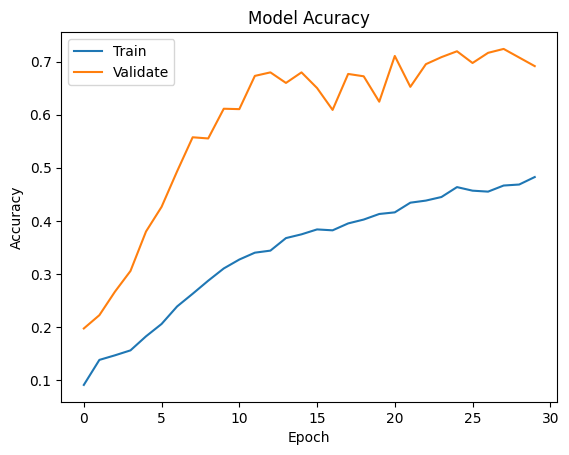

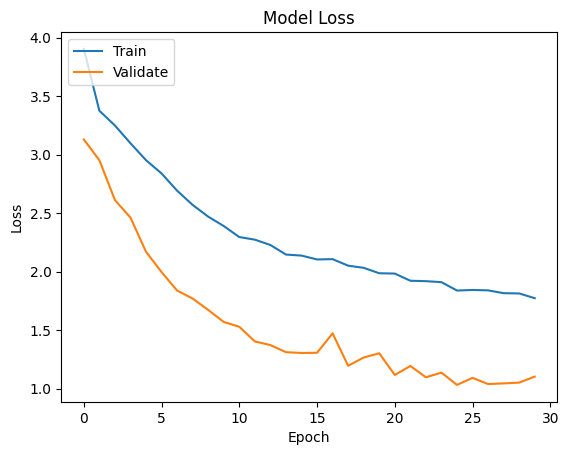

43/43 [==============================] - 5s 106ms/step - loss: 1.1019 - accuracy: 0.6915
accuracy = 0.691


In [ ]:
print("Trianable = False\n")
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

acc = model.evaluate(val_set, steps = len(val_set), verbose = 1)
print('accuracy = {:.3f}'.format(acc[1]))

In [ ]:
#6
base_model.trainable = True
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',verbose=1,patience=5)
mc = ModelCheckpoint('best_model3cls.h5',
                     monitor='val_accuracy',
                     verbose = 1,
                     save_best_only = True)
start = time.time()
history = model.fit(train_set,
                    validation_data = val_set,
                    epochs = 100,
                    verbose = 1,
                    callbacks = [es,mc])
end = time.time()
print("Time Taken:{:.2f} minutes".format((end-start/60)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 57)                7

Trianable = True



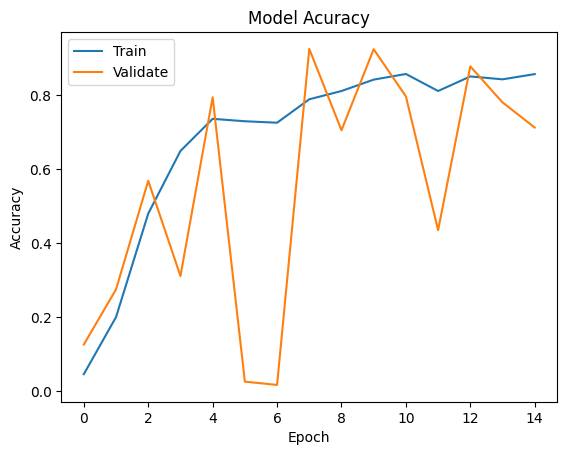

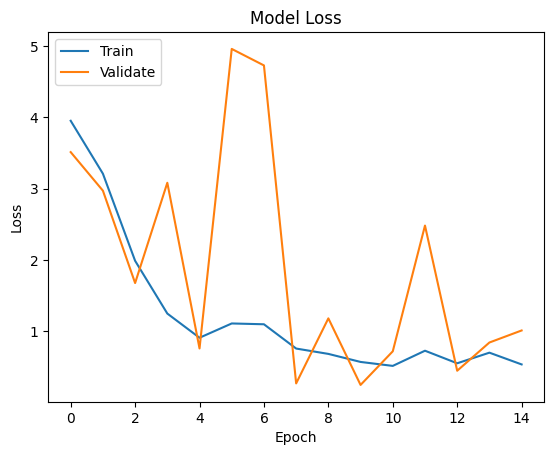

43/43 [==============================] - 4s 89ms/step - loss: 1.0139 - accuracy: 0.7121
accuracy = 0.712


In [ ]:
print("Trianable = True\n")
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

acc = model.evaluate(val_set, steps = len(val_set), verbose = 1)
print('accuracy = {:.3f}'.format(acc[1]))

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

def predict(img_fname):
  img = load_img(img_fname,target_size = target_img_shape)
  plt.imshow(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis= 0)
  img = preprocess_input(img)

  pred = model.predict(img) ; print(pred[0])
  pred_cls = labels[np.argmax(pred, -1)[0]]
  print('Prediction:', pred_cls)

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/test/'
!ls

/content/drive/MyDrive/Colab Notebooks/Senior Project/data/test
'(่)'  '(๋)'   ๓	 ๖   ๙	 ฃ   ฆ	 ฉ   ฌ	 ฏ   ฒ	 ต   ธ	 ป   พ	 ม   ล	 ษ   ฬ
'(้)'   ๐     ๔	 ๗   ก	 ค   ง	 ช   ญ	 ฐ   ณ	 ถ   น	 ผ   ฟ	 ย   ว	 ส   อ
'(๊)'   ๒     ๕	 ๘   ข	 ฅ   จ	 ซ   ฎ	 ฑ   ด	 ท   บ	 ฝ   ภ	 ร   ศ	 ห   ฮ


1/1 [==============================] - 0s 28ms/step
[9.99896693e-11 7.35853045e-11 7.88415305e-11 1.59018909e-11
 1.82986139e-06 1.18493670e-09 5.19058796e-09 2.33745945e-04
 7.30460897e-07 1.91980057e-10 3.72684994e-09 1.98677526e-06
 2.57410903e-07 1.58814562e-08 6.07574346e-09 3.46175675e-08
 8.62402649e-10 1.15478915e-08 3.27912732e-11 4.84463969e-10
 2.66580673e-06 1.77560328e-10 2.59639177e-09 9.92109120e-01
 6.26492067e-07 7.13212043e-03 3.02895444e-07 1.21724000e-07
 7.48119535e-12 2.11385331e-09 2.56516666e-11 2.19691834e-10
 2.72246981e-09 5.71483305e-09 1.81514164e-08 2.04563956e-04
 1.26251454e-08 2.41980347e-09 1.83886795e-09 3.44274076e-06
 7.41270583e-08 3.21003640e-10 5.13053879e-12 2.86784235e-10
 1.12493592e-06 2.22869687e-08 1.44410960e-05 1.43488293e-07
 7.43878127e-06 3.77871174e-07 2.81300949e-04 3.08666927e-07
 3.10386258e-06 4.42860859e-08 1.94936955e-08 6.15844371e-08
 4.61415706e-09]
Prediction: ด


'ด'

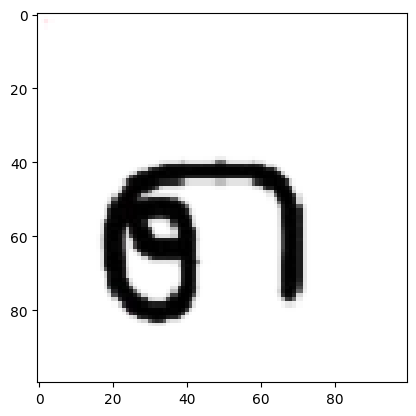

In [ ]:
predict('ด_160.png')

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/Test'
!ls
!unrar e test.rar

/content/drive/MyDrive/Colab Notebooks/Senior Project/Test
test.rar

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test.rar

Extracting  (่)_108.png                                                    0%  OK 
Extracting  (่)_113.png                                                    0%  OK 
Extracting  (่)_115.png                                                    0%  OK 
Extracting  (่)_118.png                                                    0%  OK 
Extracting  (่)_125.png                                                    0%  OK 
Extracting  (่)_127.png                                                    0%  OK 
Extracting  (่)_139.png                                                    0%  OK 
Extracting  (่)_140.png                                                    0%  OK 
Extracting  (่)_146.png                                                    0%  OK 
Ex

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/Test'
!ls

/content/drive/MyDrive/Colab Notebooks/Senior Project/Test
 ๐_10.png     '(่)_47.png'   ข_134.png   ฉ_156.png   ฐ_181.png   ท_16.png    พ_84.png    ว_97.png
 ๐_117.png     ๔_81.png     ข_140.png   ฉ_15.png    ฐ_18.png    ท_178.png   พ_88.png    ศ_105.png
 ๐_118.png     ๔_84.png     ข_160.png   ฉ_177.png   ฐ_192.png   ท_193.png   พ_91.png    ศ_121.png
 ๐_144.png     ๔_8.png	    ข_161.png   ฉ_183.png   ฐ_198.png   ท_197.png   ฟ_119.png   ศ_122.png
 ๐_148.png     ๔_92.png     ข_190.png   ฉ_189.png   ฐ_210.png   ท_19.png    ฟ_122.png   ศ_127.png
 ๐_151.png    '(่)_4.png'    ข_215.png   ฉ_194.png   ฐ_211.png   ท_213.png   ฟ_126.png   ศ_134.png
 ๐_164.png    '(๊)_4.png'    ข_225.png   ฉ_207.png   ฐ_216.png   ท_214.png   ฟ_132.png   ศ_149.png
 ๐_170.png     ๕_101.png    ข_227.png   ฉ_208.png   ฐ_223.png   ท_223.png   ฟ_136.png   ศ_14.png
 ๐_174.png     ๕_104.png    ข_230.png   ฉ_218.png   ฐ_226.png   ท_227.png   ฟ_137.png   ศ_164.png
 ๐_182.png     ๕_107.png    ข_232.png   ฉ_227.png   ฐ_229.p

Random pick --> predict --> define actual class --> save actual data --> save predicted data --> delete picked file --> loop

**Test zone don't touch it**

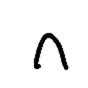

ก_70.png
Actual Class:  ก
1/1 [==============================] - 2s 2s/step
Predict Class:  ก
True
True Positive Count:  1
False Case Count:  0
File 'ก_70.png' has been deleted.


In [ ]:
import os
import random
from PIL import Image
from IPython.display import display
folder_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/Test"
from keras.preprocessing.image import load_img, img_to_array

def predict_keepclass(img_fname):
  img = load_img(img_fname,target_size = target_img_shape)
  img = img_to_array(img)
  img = np.expand_dims(img, axis= 0)
  img = preprocess_input(img)

  pred = model.predict(img)
  pred_cls = labels[np.argmax(pred, -1)[0]]
  return pred_cls

png_files = [i for i in os.listdir(folder_path) if i.endswith(".png")]

random_png = random.choice(png_files) #Contain file name

image_path = os.path.join(folder_path, random_png)
image = Image.open(image_path)

display(image)
print(random_png)
#predict(image_path)

image_name_characters = list(random_png)
#print(image_name_characters)
print("Actual Class: ", image_name_characters[0])

image_predict_class = predict_keepclass(image_path)
print("Predict Class: ", image_predict_class)

'''
True Positive คือ รูป [ก] ทำนาย [ก]
True Negative คือ (row*col) - (sth)
False Postive คือ รูป [ก] ทำนาย [ค]
False Negative คือ รูป [ก] ทำนาย [ค]
'''
truePositive = False

if image_predict_class == image_name_characters[0]:
  truePositive = True
else: truePositive = False
print(truePositive)

truePositive_count = 0
falseCase = 0
if truePositive == True:
  truePositive_count = truePositive_count+1
else: falseCase = 0

print("True Positive Count: ", truePositive_count)
print("False Case Count: ", falseCase)

os.remove(image_path)
print(f"File '{random_png}' has been deleted.")

png_files = [f for f in os.listdir(folder_path) if f.endswith(".png")]
#print(png_files)


**Unrar again**

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/Test'
!ls
!unrar e test.rar

/content/drive/MyDrive/Colab Notebooks/Senior Project/Test
 ๐_10.png     '(่)_47.png'   ข_140.png   ฉ_15.png    ฐ_18.png    ท_178.png   พ_88.png    ศ_105.png
 ๐_117.png     ๔_81.png     ข_160.png   ฉ_177.png   ฐ_192.png   ท_193.png   พ_91.png    ศ_121.png
 ๐_118.png     ๔_84.png     ข_161.png   ฉ_183.png   ฐ_198.png   ท_197.png   ฟ_119.png   ศ_122.png
 ๐_144.png     ๔_8.png	    ข_190.png   ฉ_189.png   ฐ_210.png   ท_19.png    ฟ_122.png   ศ_127.png
 ๐_148.png     ๔_92.png     ข_215.png   ฉ_194.png   ฐ_211.png   ท_213.png   ฟ_126.png   ศ_134.png
 ๐_151.png    '(่)_4.png'    ข_225.png   ฉ_207.png   ฐ_216.png   ท_214.png   ฟ_132.png   ศ_149.png
 ๐_164.png    '(๊)_4.png'    ข_227.png   ฉ_208.png   ฐ_223.png   ท_223.png   ฟ_136.png   ศ_14.png
 ๐_170.png     ๕_101.png    ข_230.png   ฉ_218.png   ฐ_226.png   ท_227.png   ฟ_137.png   ศ_164.png
 ๐_174.png     ๕_104.png    ข_232.png   ฉ_227.png   ฐ_229.png   ท_230.png   ฟ_147.png   ศ_177.png
 ๐_182.png     ๕_107.png    ข_23.png    ฉ_233.png   ฐ_236.

**Test Zone**

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display
from keras.preprocessing.image import load_img, img_to_array

folder_path = "/content/drive/MyDrive/Colab Notebooks/Senior Project/Test"
truePositive = False
truePositive_count = 0
falseCase = 0

def predict_keepclass(img_fname):
  img = load_img(img_fname,target_size = target_img_shape)
  img = img_to_array(img)
  img = np.expand_dims(img, axis= 0)
  img = preprocess_input(img)

  pred = model.predict(img)
  pred_cls = labels[np.argmax(pred, -1)[0]]
  return pred_cls


while True:
  png_files = [i for i in os.listdir(folder_path) if i.endswith(".png")]

  if not png_files:
    print("Folder is empty")
    break
  random_png = random.choice(png_files) #Contain file name

  image_path = os.path.join(folder_path, random_png)
  image = Image.open(image_path)

  #display(image)
  print("File name: ", random_png)
  #predict(image_path)

  image_name_characters = list(random_png)
  image_predict_class = predict_keepclass(image_path)
  print("Actual Class: ", image_name_characters[0])
  print("Predict Class: ", image_predict_class)

  #Check
  if image_predict_class == image_name_characters[0]:
    truePositive = True
  else: truePositive = False

  if truePositive == True:
    truePositive_count = truePositive_count + 1
  else: falseCase = falseCase + 1

  #remove file
  os.remove(image_path)
  print(f"File '{random_png}' has been deleted.")

sample_count = truePositive_count + falseCase
print("True Positive Count: ", truePositive_count)
print("False Case Count: ", falseCase)
print("Sample Count: ", sample_count)


Streaming output truncated to the last 5000 lines.
File 'ฐ_210.png' has been deleted.
File name:  ต_65.png
1/1 [==============================] - 0s 23ms/step
Actual Class:  ต
Predict Class:  ๓
File 'ต_65.png' has been deleted.
File name:  ๖_112.png
1/1 [==============================] - 0s 20ms/step
Actual Class:  ๖
Predict Class:  ๖
File '๖_112.png' has been deleted.
File name:  ก_101.png
1/1 [==============================] - 0s 21ms/step
Actual Class:  ก
Predict Class:  ก
File 'ก_101.png' has been deleted.
File name:  ฬ_90.png
1/1 [==============================] - 0s 38ms/step
Actual Class:  ฬ
Predict Class:  (๊)
File 'ฬ_90.png' has been deleted.
File name:  ๘_59.png
1/1 [==============================] - 0s 21ms/step
Actual Class:  ๘
Predict Class:  ๘
File '๘_59.png' has been deleted.
File name:  ฮ_239.png
1/1 [==============================] - 0s 22ms/step
Actual Class:  ฮ
Predict Class:  ฮ
File 'ฮ_239.png' has been deleted.
File name:  ฃ_139.png
1/1 [===========================

Trianable = True



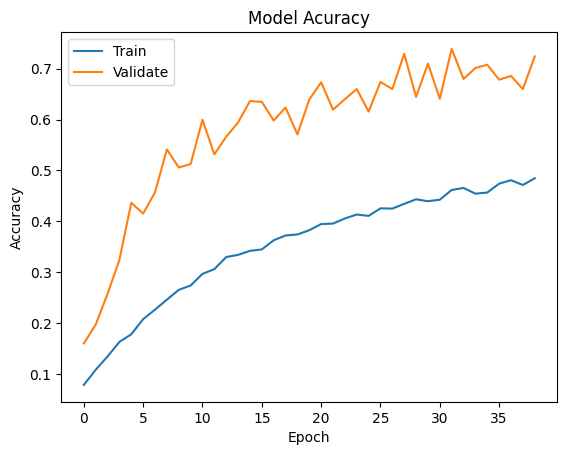

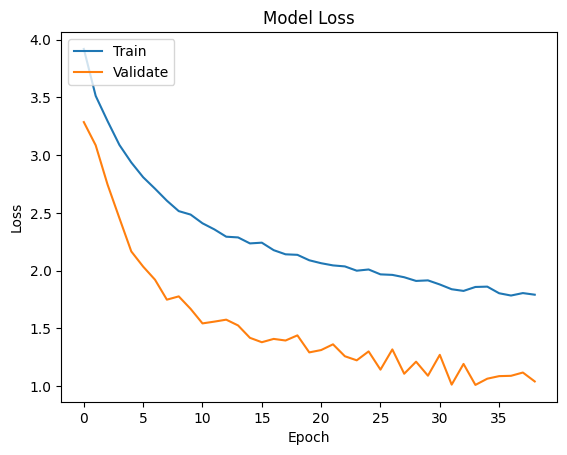

43/43 [==============================] - 8s 193ms/step - loss: 1.0415 - accuracy: 0.7239
accuracy = 0.724


In [ ]:
print("Trianable = True\n")
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('Loss.png')
plt.show()

acc = model.evaluate(val_set, steps = len(val_set), verbose = 1)
print('accuracy = {:.3f}'.format(acc[1]))

**GUI**

In [ ]:
!pip install -q gradio

In [ ]:
from tkinter import filedialog
import gradio as gr
from PIL import Image, ImageTk
import numpy as np
import cv2 as cv
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from PIL import Image as PILImage
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid/ก'
!ls

/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid/ก
Accuracy.png	   ก_125.png  ก_145.png  ก_161.png  ก_211.png  ก_49.png  ก_86.png
best_model3cls.h5  ก_127.png  ก_146.png  ก_184.png  ก_221.png  ก_5.png	 ก_90.png
Loss.png	   ก_132.png  ก_156.png  ก_19.png   ก_239.png  ก_78.png  ก_97.png
ก_104.png	   ก_140.png  ก_159.png  ก_20.png   ก_47.png   ก_85.png


In [ ]:
model_path ='/content/drive/MyDrive/Colab Notebooks/Senior Project/data/valid/ก/best_model3cls.h5'
model = load_model(model_path)

In [ ]:
def preprocess_image(image):
    processed_image = cv.resize(image, (100, 100))
    processed_image = cv.cvtColor(processed_image, cv.COLOR_BGR2RGB)
    processed_image = processed_image / 255.0
    processed_image = np.expand_dims(processed_image, axis=0)
    return processed_image

def predict(file):
    pil_image = Image.open(file.name)
    image = np.array(pil_image)

    processed_image = preprocess_image(image)

    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    thai_char = thai_characters.get(predicted_class, 'Unknown')
    file_path = f"{file.name}"

    return image, file_path, f"{thai_char}"

# Define the components
image_upload = gr.File(label="Upload Image")
label_output = gr.Textbox(label="Predicted Result")
path_output = gr.Textbox(label="File Path")

def on_submit(file):
    image, file_path, prediction = predict(file)
    return image, file_path, prediction



# Define the Interface
iface = gr.Interface(
    title="THAI CHARACTERS HANDWRITTEN RECOGNITION",
    fn=on_submit,
    inputs=image_upload,
    outputs=[gr.Image(label="Predicted Image"), path_output, label_output]
)

# Launch the Interface
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://cb0a1de453bad46e95.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 24ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cb0a1de453bad46e95.gradio.live


In [ ]:
model_path ='/content/drive/MyDrive/Colab Notebooks/Senior Project/best_model3cls.h5'
model = load_model(model_path)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 57)                7

In [ ]:
X = image_predict_class[0] #Predict Class
y = image_name_characters[0] #Actual Class

print('Predict',X)
print('Actual',y)

Predict ผ
Actual ย


In [ ]:
print(labels)

NameError: name 'labels' is not defined

In [ ]:
import matplotlib as plt
plt.__version__ # Can add font

'3.7.1'

In [ ]:
!wget -qhttps://github.com/Phonbopit/sarabun-webfont/blob/master/fonts/thsarabunnew-webfont.ttf

GNU Wget 1.21.2, a non-interactive network retriever.
Usage: wget [OPTION]... [URL]...

Mandatory arguments to long options are mandatory for short options too.

Startup:
  -V,  --version                   display the version of Wget and exit
  -h,  --help                      print this help
  -b,  --background                go to background after startup
  -e,  --execute=COMMAND           execute a `.wgetrc'-style command

Logging and input file:
  -o,  --output-file=FILE          log messages to FILE
  -a,  --append-output=FILE        append messages to FILE
  -d,  --debug                     print lots of debugging information
  -q,  --quiet                     quiet (no output)
  -v,  --verbose                   be verbose (this is the default)
  -nv, --no-verbose                turn off verboseness, without being quiet
       --report-speed=TYPE         output bandwidth as TYPE.  TYPE can be bits
  -i,  --input-file=FILE           download URLs found in local or external FILE
  

In [ ]:
plt.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
plt.rc('font', family='TH Sarabun New', size =20)

FileNotFoundError: [Errno 2] No such file or directory: 'thsarabunnew-webfont.ttf'

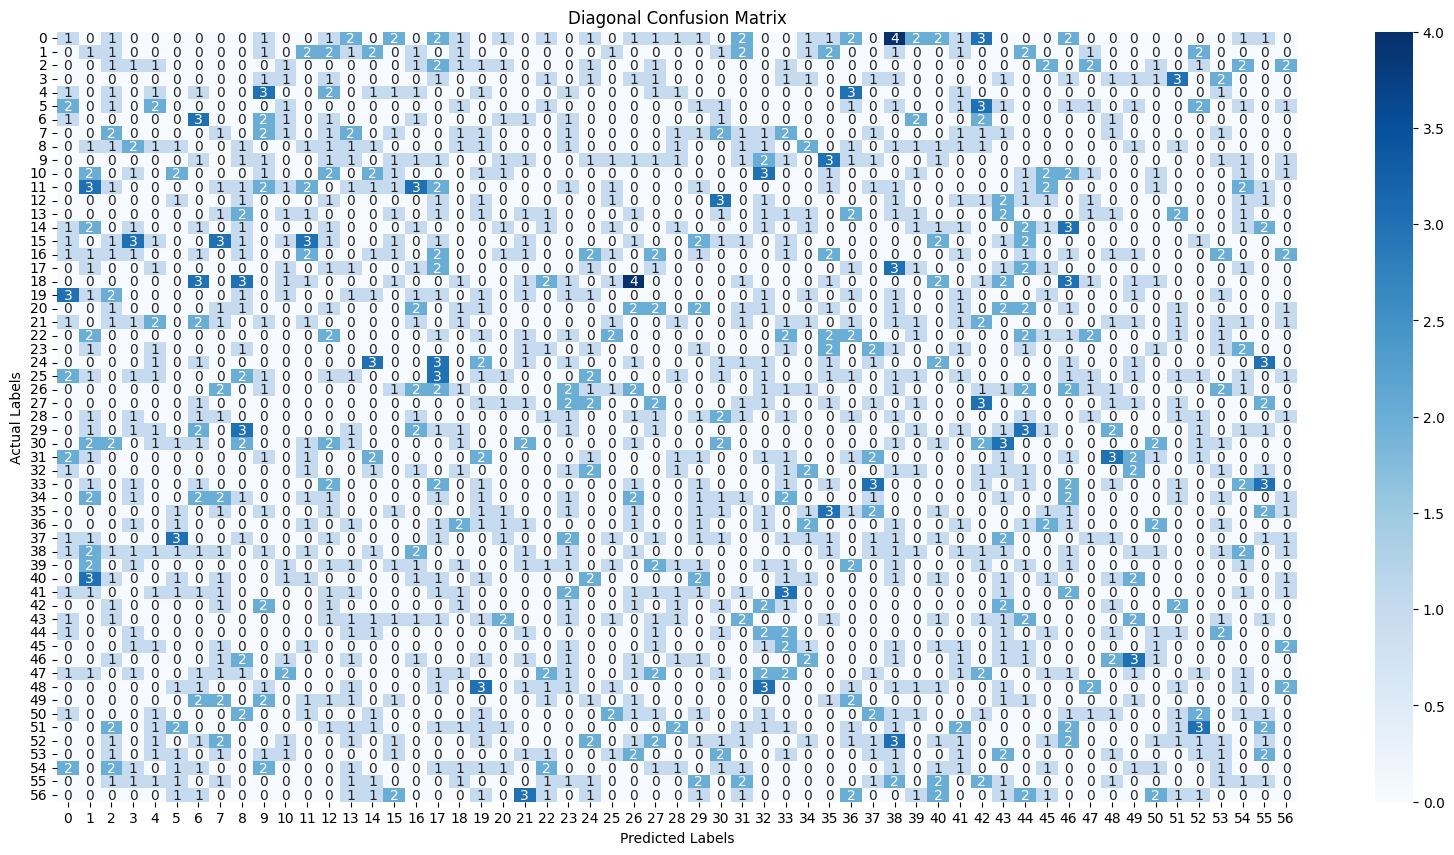

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels_list = [str(label) for label in labels.keys()]

random_predictions = [random.choice(labels_list) for _ in range(sample_count)]
actual_labels = [random.choice(labels_list) for _ in range(sample_count)]



cm = confusion_matrix(actual_labels, random_predictions, labels=labels_list)



plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Diagonal Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()



